# Operational Inefficiencies and Revenue Optimization in New York City’s Yellow Taxi Network
### A data-driven analysis of trip-level operations and economic efficiency

---

## 1. Introduction

Urban taxi systems operate within highly dynamic environments where demand, congestion, and operating conditions vary significantly across time and location. While high trip volumes are often interpreted as indicators of success, they do not necessarily imply efficient operations or optimal revenue generation.

In large metropolitan areas such as New York City, inefficiencies may arise from factors including prolonged idle time, low-margin trips, congestion-related delays, and misalignment between supply and demand. Identifying these inefficiencies requires an analytical approach that focuses not only on demand patterns, but also on **economic and operational performance**.

This project examines New York City’s yellow taxi network as a real-world case study to demonstrate how large-scale trip-level data can be used to uncover inefficiencies and support data-driven revenue optimization strategies.

---

## 2. Project Objective

The primary objective of this project is to:

> **Identify operational inefficiencies and revenue efficiency optimization opportunities
 within New York City’s yellow taxi network using large-scale trip-level data.**

Rather than producing purely descriptive statistics, this analysis is designed to:
- Evaluate **efficiency and profitability**, not just trip volume
- Identify **where and when revenue is under-optimized**
- Translate analytical findings into **actionable operational insights**

The project is structured as an applied operational analytics case study, emphasizing decision support over exploratory analysis alone.

---

## 3. Stakeholders

The insights generated by this analysis are relevant to multiple stakeholders, including:

- **Taxi fleet operators**, seeking to improve system-wide efficiency and revenue performance  
- **Independent taxi drivers**, aiming to maximize earnings per unit of time and distance  
- **Urban transportation planners and regulators**, interested in evidence-based policy and operational decisions  

All analytical choices throughout the project are guided by their practical relevance to these stakeholders.

---

## 4. Dataset Selection and Scope

### 4.1 Data Source

This project uses trip record data published by the **New York City Taxi & Limousine Commission (TLC)**, the regulatory authority overseeing taxi and for-hire vehicle operations in New York City.

The TLC dataset was selected due to:
- Its **large scale**, consisting of millions of real taxi trips
- Public availability and transparency
- Frequent use in professional, academic, and policy-oriented analyses
- Detailed temporal, geographic, and economic attributes at the trip level

These characteristics make the dataset well suited for operational and economic analysis.

---

### 4.2 Taxi Type Selection

The TLC provides multiple transportation datasets, including yellow taxis, green taxis, and for-hire vehicle (FHV) services.

This project focuses **exclusively on yellow taxi trip records**.

This choice was made to ensure:
- A **consistent pricing structure**, based on metered fares
- A uniform regulatory environment
- Comparable operating behavior across trips

Alternative datasets, such as green taxis and for-hire vehicles, were intentionally excluded to avoid introducing structural differences in pricing models, incentives, and service patterns that would complicate efficiency and revenue comparisons.

---

### 4.3 Time Scope

The analysis initially focuses on **January 2019**.

This time window was selected because:
- It represents a **pre-COVID period**, reflecting typical operating conditions
- It is sufficiently large to validate analytical assumptions and methodologies
- It enables a phased approach, where additional months can be incorporated after validation

This incremental strategy mirrors professional analytical workflows, where methods are tested on a subset before being scaled.

---

### 4.4 File Format

The dataset was downloaded in **Parquet format** rather than CSV.

This format was chosen because:
- Columnar storage improves read performance
- Memory usage is reduced when working with large datasets
- Parquet is a widely adopted industry standard for analytical pipelines

The use of Parquet supports efficient and reproducible analysis at scale.

---

## 5. Analytical Approach

The analysis is structured to ensure transparency, interpretability, and decision relevance. The workflow consists of the following stages:

1. **Data validation and schema inspection**  
   Verification of data types, timestamps, and core fields.

2. **Data cleaning and quality control**  
   Identification and removal of invalid or physically impossible trips.

3. **Feature engineering**  
   Creation of operational and economic metrics aligned with business objectives.

4. **KPI definition**  
   Measurement of efficiency, profitability, and utilization rather than raw volume.

5. **Exploratory analysis with purpose**  
   Each visualization addresses a specific operational question.

6. **Problem identification and recommendations**  
   Translation of insights into realistic, data-driven operational actions.

Only after establishing this context does the project proceed to data inspection and preparation.

---

## 6. Data Validation and Initial Inspection

Before performing any cleaning, transformation, or analysis, it is essential to validate the structure and integrity of the dataset. This step ensures that subsequent findings are based on reliable data and that key assumptions about timestamps, numeric fields, and categorical variables are correct.

Data validation at this stage focuses on understanding the dataset as provided, without modifying or filtering records.

---

### 6.1 Dataset Loading

The dataset is loaded locally from a Parquet file. Due to the large size of the dataset, all processing is performed locally to ensure efficiency and reproducibility.

At this stage, the objective is to confirm:
- The dataset loads successfully
- The expected number of rows and columns is present
- Core fields required for analysis are available

No transformations or filtering are applied during this step.

---

### 6.2 Schema Inspection

After loading the dataset, the schema is inspected to verify:
- Data types of each column
- Presence of datetime fields for pickup and drop-off times
- Numeric representation of monetary and distance-related variables
- Potential type inconsistencies that may require correction

This step is critical, as incorrect data types (e.g., numeric values stored as strings) can silently distort calculations and downstream KPIs.

---

### 6.3 Initial Observations

Based on the schema inspection, particular attention is given to:
- Timestamp fields used for trip duration calculations
- Monetary fields used for revenue and profitability metrics
- Categorical fields that represent operational attributes such as payment type and vendor

Any inconsistencies identified at this stage are documented and addressed explicitly in subsequent cleaning steps.

---

### 6.4 Data Quality Considerations

At this point, no records are removed. Instead, the dataset is assessed for:
- Missing values
- Obvious anomalies (e.g. negative distances or fares)
- Columns with unexpectedly high null rates

These observations inform the **data cleaning strategy**, which is applied in a controlled and justified manner in the next section.

---

### 6.5 Transition to Cleaning

The next section introduces the data cleaning and preparation steps. Each rule applied is motivated by physical, economic, or operational constraints to ensure that the resulting dataset remains representative while removing records that would invalidate efficiency and revenue calculations.

---

### 6.6 Code: Data Loading and Schema Validation

The following code loads the dataset and performs an initial inspection of its structure.  
No transformations, filtering, or feature engineering are applied at this stage.

The purpose of this step is strictly to:
- Confirm successful data loading
- Validate dataset dimensions
- Inspect column names and data types


In [1]:
import pandas as pd

# Load dataset from local Parquet file
df = pd.read_parquet("yellow_tripdata_2019-01.parquet")

# Basic structural validation
df.shape

(7696617, 19)

In [2]:
# Inspect schema and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696617 entries, 0 to 7696616
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [3]:
# Preview first rows to confirm data integrity
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


### 6.7 Initial Observations from Data Inspection

The initial inspection confirms that the dataset loaded successfully and is structurally suitable for large-scale operational analysis.

The dataset contains **7,696,617 trip records** and **19 columns**, representing a substantial volume of real-world transactional data. This scale supports robust inference regarding demand patterns, efficiency, and revenue behavior within the yellow taxi network.

---

#### Dataset Structure

The schema inspection reveals a clear separation of column types:

- **Temporal fields**
  - `tpep_pickup_datetime`
  - `tpep_dropoff_datetime`  
  These fields are correctly parsed as datetime objects, enabling accurate calculation of trip duration and time-based features.

- **Operational and categorical identifiers**
  - `VendorID`
  - `RatecodeID`
  - `store_and_fwd_flag`
  - `PULocationID`
  - `DOLocationID`
  - `payment_type`  
  These fields describe vendor affiliation, pricing rules, trip routing, and payment behavior.

- **Distance and passenger information**
  - `trip_distance`
  - `passenger_count`

- **Monetary components**
  - `fare_amount`
  - `extra`
  - `mta_tax`
  - `tip_amount`
  - `tolls_amount`
  - `improvement_surcharge`
  - `congestion_surcharge`
  - `airport_fee`
  - `total_amount`

This structure provides sufficient detail to analyze both **trip-level operations** and **revenue composition**.

---

#### Data Type Considerations

Most numeric fields are stored using appropriate numeric data types. However, two columns (`store_and_fwd_flag` and `airport_fee`) are stored as object types.

- The `store_and_fwd_flag` column is expected to represent a categorical indicator and will require categorical handling.
- The `airport_fee` column appears to contain missing values and non-numeric representations, suggesting that type correction and validation will be necessary before incorporating it into revenue calculations.

These observations highlight the importance of controlled type conversion during the cleaning phase.

---

#### Preliminary Data Quality Signals

A preliminary review of the first records reveals several important data quality considerations:

- Some trips exhibit **zero trip distance**, despite having non-zero fares and timestamps.
- Pickup and drop-off timestamps include values outside the nominal January 2019 window, indicating that the file may include late-recorded or boundary-crossing trips.
- Certain monetary components (e.g., congestion surcharge and airport fee) contain missing values, which must be explicitly addressed to avoid biased revenue estimates.

At this stage, no records are removed. These observations are documented to inform a **rule-based and transparent cleaning strategy** in the subsequent section.

---

#### Readiness for Cleaning

Overall, the dataset is:
- Structurally sound
- Rich in operational and economic attributes
- Suitable for feature engineering and KPI construction

The next step focuses on **data cleaning and preparation**, where explicit, justified rules will be applied to remove invalid or physically implausible trips while preserving the representativeness of the dataset.

## 7. Data Cleaning and Preparation

Following initial validation and inspection, the next step is to prepare the dataset for analysis by addressing data quality issues identified in the previous section. The objective of this phase is not to aggressively reduce the dataset, but to ensure that all remaining records represent **physically plausible and economically meaningful taxi trips**.

All cleaning rules applied in this section are explicitly justified to preserve transparency and analytical integrity.

---

### 7.1 Cleaning Philosophy

The cleaning strategy is guided by three core principles:

1. **Physical plausibility**  
   Trips must be feasible in real-world conditions (e.g., positive duration and distance).

2. **Economic validity**  
   Trips must support meaningful revenue and efficiency calculations.

3. **Minimal distortion**  
   Records are removed only when they would otherwise bias or invalidate key performance indicators.

This approach avoids arbitrary filtering and ensures that insights remain representative of actual taxi operations.

---

### 7.2 Identification of Invalid Trips

Based on prior inspection, several categories of potentially invalid records are identified:

- Trips with zero or negative duration  
- Trips with zero or negative distance  
- Trips with non-positive total fare amounts  
- Trips exhibiting physically implausible speeds  

Such records cannot support valid efficiency or revenue analysis and must be excluded.

---

### 7.3 Duration and Distance Constraints

Trip duration and distance are foundational to nearly all operational metrics in this analysis.

Records with:
- Non-positive trip duration, or
- Non-positive trip distance

are removed, as they imply either incomplete records or data entry errors.

These constraints ensure that subsequent calculations of speed, revenue per hour, and revenue per mile are mathematically and conceptually sound.

---

### 7.4 Revenue Constraints

Trips with non-positive monetary values are excluded from the cleaned dataset.

Specifically:
- Trips with negative or zero `total_amount`
- Trips with negative `fare_amount`

Such records may reflect refunds, adjustments, or data inconsistencies and would distort profitability metrics if retained.

---

### 7.5 Speed-Based Validation

Speed is used as a secondary validation metric to identify anomalous trips.

Trips exhibiting:
- Extremely low speeds (approaching zero), or
- Unreasonably high speeds inconsistent with urban driving conditions

are flagged as implausible.

A conservative speed range is applied to remove these outliers while preserving legitimate congestion-related variation.

This step is particularly important for protecting revenue-per-hour metrics from distortion.

---

### 7.6 Handling of Missing and Inconsistent Values

Certain monetary components, such as airport fees and congestion surcharges, contain missing values.

Rather than imputing values at this stage, missing components are:
- Explicitly retained as missing, or
- Converted to numeric types where appropriate

This ensures transparency and prevents artificial inflation or deflation of revenue metrics.

---

### 7.7 Resulting Cleaned Dataset

After applying the above rules, the resulting dataset represents a filtered but still large and representative subset of taxi trips suitable for:

- Feature engineering
- KPI construction
- Exploratory analysis
- Revenue optimization assessment

The size of the cleaned dataset and the proportion of removed records are reported to ensure traceability and accountability.

---

### 7.8 Transition to Implementation

The following section presents the code implementing the above cleaning rules. Each operation directly corresponds to the constraints described above and is applied in a reproducible manner.

---

## 7. Data Cleaning and Preparation

Following initial validation and inspection, the next step is to prepare the dataset for analysis by addressing data quality issues identified in the previous section. The objective of this phase is not to aggressively reduce the dataset, but to ensure that all remaining records represent **physically plausible and economically meaningful taxi trips**.

All cleaning rules applied in this section are explicitly justified to preserve transparency and analytical integrity.

---

### 7.1 Cleaning Philosophy

The cleaning strategy is guided by three core principles:

1. **Physical plausibility**  
   Trips must be feasible in real-world conditions (e.g., positive duration and distance).

2. **Economic validity**  
   Trips must support meaningful revenue and efficiency calculations.

3. **Minimal distortion**  
   Records are removed only when they would otherwise bias or invalidate key performance indicators.

This approach avoids arbitrary filtering and ensures that insights remain representative of actual taxi operations.

---

### 7.2 Identification of Invalid Trips

Based on prior inspection, several categories of potentially invalid records are identified:

- Trips with zero or negative duration  
- Trips with zero or negative distance  
- Trips with non-positive total fare amounts  
- Trips exhibiting physically implausible speeds  

Such records cannot support valid efficiency or revenue analysis and must be excluded.

---

### 7.3 Duration and Distance Constraints

Trip duration and distance are foundational to nearly all operational metrics in this analysis.

Records with:
- Non-positive trip duration, or
- Non-positive trip distance

are removed, as they imply either incomplete records or data entry errors.

These constraints ensure that subsequent calculations of speed, revenue per hour, and revenue per mile are mathematically and conceptually sound.

---

### 7.4 Revenue Constraints

Trips with non-positive monetary values are excluded from the cleaned dataset.

Specifically:
- Trips with negative or zero `total_amount`
- Trips with negative `fare_amount`

Such records may reflect refunds, adjustments, or data inconsistencies and would distort profitability metrics if retained.

---

### 7.5 Speed-Based Validation

Speed is used as a secondary validation metric to identify anomalous trips.

Trips exhibiting:
- Extremely low speeds (approaching zero), or
- Unreasonably high speeds inconsistent with urban driving conditions

are flagged as implausible.

A conservative speed range is applied to remove these outliers while preserving legitimate congestion-related variation.

This step is particularly important for protecting revenue-per-hour metrics from distortion.

---

### 7.6 Handling of Missing and Inconsistent Values

Certain monetary components, such as airport fees and congestion surcharges, contain missing values.

Rather than imputing values at this stage, missing components are:
- Explicitly retained as missing, or
- Converted to numeric types where appropriate

This ensures transparency and prevents artificial inflation or deflation of revenue metrics.

---

### 7.7 Resulting Cleaned Dataset

After applying the above rules, the resulting dataset represents a filtered but still large and representative subset of taxi trips suitable for:

- Feature engineering
- KPI construction
- Exploratory analysis
- Revenue optimization assessment

The size of the cleaned dataset and the proportion of removed records are reported to ensure traceability and accountability.

---

### 7.8 Transition to Implementation

The following section presents the code implementing the above cleaning rules. Each operation directly corresponds to the constraints described above and is applied in a reproducible manner.


In [4]:
import numpy as np

# Trip duration in minutes (core validation feature)
df["trip_duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [5]:
# Convert airport_fee to numeric; invalid entries become NaN (transparent handling)
df["airport_fee"] = pd.to_numeric(df["airport_fee"], errors="coerce")

In [6]:
# Quantify invalid record prevalence prior to filtering (auditability of cleaning impact)
pd.Series({"duration<=0": (df["trip_duration_min"] <= 0).mean(), "distance<=0": (df["trip_distance"] <= 0).mean(), "total_amount<=0": (df["total_amount"] <= 0).mean(), "fare_amount<0": (df["fare_amount"] < 0).mean()}).sort_values(ascending=False)


distance<=0        0.007158
total_amount<=0    0.001139
fare_amount<0      0.000926
duration<=0        0.000852
dtype: float64

In [7]:
# Compute implied trip speed (mph) to identify physically implausible records
df["speed_mph"] = df["trip_distance"] / (df["trip_duration_min"] / 60)


In [8]:
# Measure prevalence of implausible speeds prior to filtering (supports conservative thresholding)
pd.Series({"speed<=0": (df["speed_mph"] <= 0).mean(), "speed>80": (df["speed_mph"] > 80).mean()}).sort_values(ascending=False)


speed<=0    0.006360
speed>80    0.000852
dtype: float64

In [9]:
# Apply rule-based filters to remove physically implausible and economically invalid trips,
# ensuring that the resulting dataset supports reliable efficiency and revenue calculations
df_clean = df[(df["trip_duration_min"] > 0) & (df["trip_distance"] > 0) & (df["total_amount"] > 0) & (df["fare_amount"] >= 0) & (df["speed_mph"].between(0.5, 80))]
df_clean = df_clean.copy()  # Explicit copy to avoid chained assignment ambiguity


In [10]:
# Report dataset size before and after cleaning (traceability)
(df.shape, df_clean.shape)


((7696617, 21), (7609046, 21))

In [11]:
# Compute fraction of records removed by cleaning rules (accountability)
1 - (len(df_clean) / len(df))


0.011377856011283938

To prepare the dataset for analysis, a set of rule-based filters is applied to remove records that violate basic physical or economic constraints.

Trips are retained only if:
- Trip duration is strictly positive
- Trip distance is strictly positive
- Total trip amount is positive
- Fare amount is non-negative
- Implied trip speed falls within a conservative and physically plausible range

These rules ensure that all retained records support meaningful calculations of efficiency metrics such as revenue per hour and revenue per mile. The applied thresholds are intentionally conservative to avoid removing legitimate variation caused by congestion, routing differences, or pricing structures.

After filtering, an explicit copy of the cleaned dataset is created to ensure safe downstream feature engineering and to prevent ambiguous chained assignments.


### 7.10 Cleaning Results and Observations

The application of rule-based data cleaning resulted in a modest reduction of records while substantially improving the reliability of downstream efficiency and revenue metrics.

Out of **7,696,617 total trip records**, **7,609,046 records** were retained after cleaning. This corresponds to the removal of approximately **1.14% of the dataset**, indicating that the vast majority of trips are valid and suitable for analysis.

---

#### Invalid Record Prevalence (Pre-Cleaning)

Prior to filtering, the prevalence of invalid or potentially problematic records was quantified:

- Trips with non-positive distance: **~0.72%**
- Trips with non-positive total amount: **~0.11%**
- Trips with negative fare amounts: **~0.09%**
- Trips with non-positive duration: **~0.09%**

These figures demonstrate that while the dataset is largely well-structured, a non-trivial number of records violate basic physical or economic constraints and would distort efficiency metrics if retained.

---

#### Speed-Based Validation

Implied trip speed was used as an additional plausibility check:

- Trips with non-positive speed: **~0.64%**
- Trips exceeding 80 mph: **~0.09%**

The presence of these extreme values suggests data inconsistencies such as timestamp errors or incomplete records. A conservative speed range was therefore applied to remove only the most implausible observations while preserving legitimate variation caused by congestion and routing differences.

---

#### Impact of Cleaning Rules

The relatively small proportion of removed records confirms that the applied rules were **targeted and conservative**, rather than overly aggressive. Importantly:

- The cleaned dataset remains large and representative of real taxi operations.
- All retained trips support meaningful calculations of duration, distance, speed, and revenue-based KPIs.
- The risk of distortion in revenue-per-hour and revenue-per-mile metrics is significantly reduced.

---

#### Analytical Readiness

After cleaning, the dataset is considered **analysis-ready** for:
- Feature engineering
- KPI construction
- Exploratory analysis of efficiency and profitability
- Identification of operational inefficiencies

The next stage of the project focuses on **feature engineering and KPI definition**, where operational metrics are derived to support decision-oriented analysis.

---

## 8. Feature Engineering and KPI Definition

With the dataset cleaned and validated, the next step is to derive features that translate raw trip records into **operationally meaningful metrics**. Feature engineering in this project is guided by the principle that every derived variable must support a specific analytical or decision-making purpose.

Rather than maximizing the number of features, the focus is on creating a **concise set of interpretable metrics** aligned with efficiency, profitability, and utilization.

---

### 8.1 Feature Engineering Philosophy

Raw trip attributes such as timestamps, distances, and fares are not directly comparable across trips of varying length and duration. To support meaningful comparisons, these attributes are transformed into **normalized operational measures**.

All engineered features in this section satisfy at least one of the following objectives:

- Enable comparison across trips of different durations or distances  
- Capture efficiency or productivity rather than volume  
- Support actionable insights for operational decision-making  

This ensures that subsequent analyses remain focused on **performance**, not just activity.

---

### 8.2 Temporal Features

Time-based features are engineered to capture demand and efficiency patterns across different temporal dimensions.

The following features are derived:

- **Pickup hour**  
  Enables identification of intra-day demand and efficiency variation.

- **Day of week**  
  Supports comparison between weekday and weekend operations.

- **Weekend indicator**  
  Simplifies segmentation of demand and revenue behavior.

These features allow efficiency metrics to be evaluated in the context of temporal demand cycles.

---

### 8.3 Duration and Speed Metrics

Trip duration and speed are central to understanding operational efficiency.

Derived metrics include:

- **Trip duration (hours)**  
  Required for productivity and revenue-per-hour calculations.

- **Implied trip speed (mph)**  
  Provides insight into congestion effects and operational constraints.

These metrics help distinguish between long-duration trips driven by distance and those driven by congestion or inefficiency.

---

### 8.4 Revenue Normalization Metrics

To assess profitability and efficiency, revenue must be normalized by time and distance.

The following KPIs are constructed:

- **Revenue per mile**  
  Measures economic efficiency relative to distance traveled.

- **Revenue per hour**  
  Measures driver earning efficiency relative to time invested.

These KPIs are central to identifying underperforming trips, time windows, and operational patterns.

---

### 8.5 Service and Behavioral Metrics

Customer behavior and service characteristics provide additional context for revenue performance.

The following metric is included:

- **Tip ratio**  
  Defined as the proportion of tip amount relative to fare amount.  
  This metric serves as a proxy for rider behavior and perceived service quality, normalized for trip length.

---

### 8.6 KPI Summary

The engineered features support the construction of a focused KPI framework:

| KPI | Interpretation | Analytical Purpose |
|---|---|---|
| Revenue per hour | Earnings efficiency | Driver productivity |
| Revenue per mile | Distance efficiency | Route and pricing assessment |
| Trip duration | Time investment | Congestion and efficiency |
| Speed | Operational constraint | Plausibility and congestion |
| Tip ratio | Service behavior | Customer response |

Together, these metrics form the foundation for the exploratory and diagnostic analyses that follow.

---

### 8.7 Transition to Implementation

The following section presents the code used to implement the feature engineering steps described above. Each transformation is directly aligned with the definitions and motivations outlined in this section.

---


### 8.8 Code: Feature Engineering Implementation

The following code implements the feature engineering steps defined in Sections 8.2–8.5.  
Each derived feature is created using a single, clearly documented transformation to ensure transparency and reproducibility.


In [12]:
# Extract pickup hour to analyze intra-day demand and efficiency patterns
df_clean["pickup_hour"] = df_clean["tpep_pickup_datetime"].dt.hour

In [13]:
# Extract day of week (Monday=0) to compare weekday and weekend operations
df_clean["pickup_dow"] = df_clean["tpep_pickup_datetime"].dt.dayofweek


In [14]:
# Create binary weekend indicator to simplify temporal segmentation
df_clean["is_weekend"] = df_clean["pickup_dow"].isin([5, 6]).astype(int)


In [15]:
# Convert trip duration to hours for productivity and revenue-per-hour calculations
df_clean["trip_duration_hr"] = df_clean["trip_duration_min"] / 60


In [16]:
# Compute revenue efficiency per mile traveled
df_clean["revenue_per_mile"] = df_clean["total_amount"] / df_clean["trip_distance"]


In [17]:
# Compute revenue efficiency per hour of driving time
df_clean["revenue_per_hour"] = df_clean["total_amount"] / df_clean["trip_duration_hr"]


In [18]:
# Remove extreme revenue-per-hour outliers caused by near-zero trip durations
upper_cap = df_clean["revenue_per_hour"].quantile(0.995)
df_clean = df_clean[df_clean["revenue_per_hour"] <= upper_cap]


In [19]:
# Compute tip ratio as a normalized proxy for service and rider behavior
df_clean["tip_ratio"] = np.where(df_clean["fare_amount"] > 0, df_clean["tip_amount"] / df_clean["fare_amount"], np.nan)


In [20]:
# Verify distributions of engineered features for plausibility
df_clean[["pickup_hour","pickup_dow","trip_duration_hr","revenue_per_mile","revenue_per_hour","tip_ratio"]].describe()


,pickup_hour,pickup_dow,trip_duration_hr,revenue_per_mile,revenue_per_hour,tip_ratio
count,7.571000e+06,7.571000e+06,7.571000e+06,7.571000e+06,7.571000e+06,7.570456e+06
mean,1.379352e+01,2.905866e+00,2.231219e-01,7.806882e+00,7.825532e+01,1.546315e-01
std,5.929125e+00,1.874851e+00,3.857841e-01,4.336652e+00,2.828462e+01,3.003069e-01
min,0.000000e+00,0.000000e+00,2.222222e-03,4.016064e-03,8.731711e-02,0.000000e+00
25%,1.000000e+01,1.000000e+00,1.038889e-01,5.380952e+00,5.934342e+01,0.000000e+00
50%,1.400000e+01,3.000000e+00,1.711111e-01,7.084337e+00,7.142629e+01,2.088235e-01
75%,1.900000e+01,4.000000e+00,2.783333e-01,9.264706e+00,8.921283e+01,2.333333e-01
max,2.300000e+01,6.000000e+00,2.399972e+01,4.800000e+02,2.619832e+02,7.550000e+02


**Outlier handling**

A small number of trips had unrealistically high revenue-per-hour values due to
very short recorded durations.
To ensure that efficiency metrics reflect typical driving conditions, these extreme
cases were conservatively excluded from the analysis.


### 8.9 Feature Engineering Observations

The descriptive statistics of the engineered features indicate that the derived metrics are generally well-behaved, interpretable, and suitable for downstream analysis. The large number of non-missing observations confirms that the cleaning and feature engineering steps preserved the representativeness of the dataset.

---

#### Temporal Features

The `pickup_hour` variable spans the full 24-hour range (0–23), with a mean value of approximately 13.8, indicating that trips are broadly distributed throughout the day. This supports the use of hourly segmentation to analyze intra-day demand and efficiency patterns.

The `pickup_dow` feature ranges from 0 to 6, corresponding to Monday through Sunday, with a balanced distribution across weekdays and weekends. The derived `is_weekend` indicator therefore provides a meaningful simplification for contrasting weekday and weekend operational behavior.

---

#### Trip Duration

The engineered `trip_duration_hr` feature has:
- A median value of approximately **0.17 hours** (~10 minutes)
- An interquartile range extending from roughly **6 minutes to 17 minutes**
- A long right tail, with maximum values corresponding to unusually long trips

This distribution aligns with expectations for urban taxi operations, where most trips are short but a small number of longer-duration trips exist. The presence of extreme values suggests that additional robustness measures (e.g., capping or percentile-based analysis) may be considered in later stages when computing aggregate KPIs.

---

#### Revenue Efficiency Metrics

The `revenue_per_mile` metric shows a median value of approximately **$7.1 per mile**, with higher values observed in the upper quartile. This indicates substantial variability in distance-based efficiency, likely driven by congestion, short trips, and pricing structure.

The `revenue_per_hour` metric exhibits a median value of approximately **$71.6 per hour**, with a pronounced right tail. While most trips fall within a reasonable earning range, the extreme maximum values highlight the presence of short-duration, high-fare trips that can inflate averages if not treated carefully.

These observations suggest that median-based comparisons and segmented analysis will be more informative than relying solely on mean values.

---

#### Tip Ratio

The `tip_ratio` feature displays a median value of approximately **0.21**, indicating that, for tipped trips, gratuities commonly represent around 20% of the fare amount. However, the lower quartile is zero, reflecting a substantial share of trips with no tip.

The presence of extreme maximum values suggests occasional anomalous tipping behavior or data irregularities. As with revenue metrics, robust summary statistics and segmentation will be prioritized in subsequent analysis.

---

#### Overall Assessment

Overall, the engineered features behave consistently with expectations for a large, real-world urban taxi dataset. While the presence of skewness and extreme values is unavoidable at this scale, the features are well suited for:
- Segmented exploratory analysis
- KPI comparison across time and operational contexts
- Identification of underperforming patterns and inefficiencies

---

## 9. Exploratory Analysis and Operational Insights

With validated and engineered features in place, the analysis now shifts from preparation to **diagnosis**. The purpose of this section is to identify meaningful operational patterns and inefficiencies by examining how performance metrics vary across time.

Unlike previous sections, the focus here is not on individual trips, but on **aggregated behavior**, normalized to avoid misleading volume-driven conclusions.

---

### 9.1 Analytical Principles

To ensure interpretability and fairness across comparisons, the following principles guide all analyses in this section:

- **Normalization over volume**  
  Raw counts and totals are avoided. Metrics are expressed as rates, medians, or averages per trip.

- **Robust statistics**  
  Median values are prioritized over means to reduce the influence of extreme outliers.

- **Segmented comparison**  
  Performance is evaluated across time-based segments to reveal inefficiencies hidden in aggregate statistics.

These principles ensure that observed patterns reflect **operational efficiency**, not simply higher activity levels.

---

### 9.2 Key Question: When Do Trips Become Inefficient?

The first diagnostic question addresses temporal inefficiency:

> **How does trip efficiency vary across the hours of the day?**

Understanding intra-day variation is critical for identifying:
- Periods of high demand but low profitability
- Time windows where drivers may experience prolonged idle time
- Opportunities for operational or pricing interventions

To answer this question, trips are grouped by pickup hour and evaluated using **normalized efficiency metrics**, rather than total revenue or trip counts.

---

### 9.3 Metrics Used

The following metrics are used to assess hourly performance:

- **Median revenue per hour**  
  Measures how effectively driving time is converted into earnings.

- **Median revenue per mile**  
  Measures distance-based efficiency and pricing effectiveness.

- **Trip share (%)**  
  Represents the proportion of total trips occurring in each hour, providing context without biasing efficiency comparisons.

These metrics are evaluated jointly to distinguish between **busy hours** and **productive hours**.

---

### 9.4 Expected Insight Types

This analysis is designed to uncover patterns such as:
- Hours with high trip volume but low revenue efficiency
- Hours with fewer trips but disproportionately high earnings per trip
- Transitional periods where efficiency rapidly changes

The goal is not merely to describe patterns, but to identify **actionable inefficiencies** that can inform operational decisions.

---

### 9.5 Transition to Implementation

The following section presents the code used to aggregate and normalize trip-level data by pickup hour. All aggregations are performed in a transparent manner, and no assumptions are introduced without explicit justification.

---

### 9.6 Code: Hourly Efficiency Analysis

To evaluate how operational performance varies throughout the day, trips are grouped by pickup hour and summarized using normalized metrics. Median values are prioritized to reduce sensitivity to outliers.

The resulting table reports:
- Trip share (%) by hour
- Median trip duration
- Median revenue efficiency per hour and per mile
- Median tip ratio



In [21]:
hourly = df_clean.groupby("pickup_hour").agg(
    trips=("pickup_hour", "size"),
    median_duration_min=("trip_duration_min", "median"),
    median_rev_per_hour=("revenue_per_hour", "median"),
    median_rev_per_mile=("revenue_per_mile", "median"),
    median_tip_ratio=("tip_ratio", "median")).reset_index()

In [22]:
hourly["trip_share_pct"] = 100 * hourly["trips"] / hourly["trips"].sum()

In [23]:
hourly = hourly.sort_values("pickup_hour")[["pickup_hour","trips","trip_share_pct","median_duration_min","median_rev_per_hour","median_rev_per_mile","median_tip_ratio"]]
hourly


,pickup_hour,trips,trip_share_pct,median_duration_min,median_rev_per_hour,median_rev_per_mile,median_tip_ratio
0,0,203243,2.684493,9.916667,80.104265,5.939394,0.210400
1,1,145704,1.924501,9.616667,80.608696,5.890810,0.210417
2,2,106468,1.406261,9.316667,81.697417,5.827815,0.209259
3,3,75567,0.998111,9.216667,83.799582,5.605096,0.180000
4,4,58953,0.778669,9.550000,88.219780,5.130435,0.074074
5,5,72748,0.960877,7.866667,95.414634,5.470019,0.137778
6,6,174484,2.304636,7.666667,82.204724,5.880952,0.166667
7,7,299619,3.957456,9.316667,71.958042,6.636364,0.201538
8,8,368535,4.867719,10.650000,65.831202,7.550000,0.208205
9,9,360827,4.765909,10.983333,65.429126,7.733333,0.208000


In [24]:
hourly.sort_values("median_rev_per_hour", ascending=False).head(5)

,pickup_hour,trips,trip_share_pct,median_duration_min,median_rev_per_hour,median_rev_per_mile,median_tip_ratio
5,5,72748,0.960877,7.866667,95.414634,5.470019,0.137778
4,4,58953,0.778669,9.550000,88.219780,5.130435,0.074074
3,3,75567,0.998111,9.216667,83.799582,5.605096,0.180000
6,6,174484,2.304636,7.666667,82.204724,5.880952,0.166667
2,2,106468,1.406261,9.316667,81.697417,5.827815,0.209259


In [25]:
hourly.sort_values("median_rev_per_hour", ascending=True).head(5)

,pickup_hour,trips,trip_share_pct,median_duration_min,median_rev_per_hour,median_rev_per_mile,median_tip_ratio
15,15,445472,5.883926,10.683333,65.049505,7.314286,0.203077
11,11,370205,4.889777,10.766667,65.344538,7.555556,0.205714
9,9,360827,4.765909,10.983333,65.429126,7.733333,0.208000
14,14,426430,5.632413,10.700000,65.498652,7.291667,0.202885
8,8,368535,4.867719,10.650000,65.831202,7.550000,0.208205


### 9.7 Hourly Operational Insights

The hourly analysis reveals a clear disconnect between trip volume and operational efficiency. While certain hours account for a large share of total trips, they do not necessarily generate the highest revenue efficiency for drivers.

---

#### High-Efficiency, Low-Volume Hours

Early morning hours, particularly around **05:00–06:00**, exhibit the highest median revenue per hour despite accounting for a relatively small proportion of total trips. These periods are characterized by:
- Shorter trip durations
- Low congestion
- Sufficient demand relative to driver supply

This combination results in highly efficient use of driving time, indicating an underutilized high-value operating window.

---

#### High-Volume, Low-Efficiency Hours

Morning and midday periods (approximately **07:00–14:00**) account for a substantial share of total trips but consistently exhibit lower median revenue per hour. Although demand is high, increased congestion and longer trip durations reduce earning efficiency.

These hours represent periods of **operational inefficiency**, where driver activity is high but productivity is diminished.

---

#### Evening Recovery

During late afternoon and early evening hours (**16:00–19:00**), revenue efficiency improves relative to midday levels. While congestion remains present, higher fares and longer trips partially offset time losses, resulting in moderate efficiency gains.

---

#### Key Insight

Overall, the analysis demonstrates that **trip volume is a poor proxy for driver profitability**. The most crowded hours are not the most productive, and the most efficient earning opportunities occur during periods with fewer active drivers.

This pattern suggests that inefficiencies in the taxi system are driven by supply concentration rather than insufficient demand.

---

#### Implications for Operations

These findings highlight opportunities for:
- Better temporal allocation of drivers
- Incentive mechanisms to shift supply toward high-efficiency hours
- Improved decision-making based on efficiency metrics rather than raw demand


## 10. Recommendations and Optimization Strategies

The hourly analysis reveals that inefficiencies in the New York City yellow taxi system are primarily driven by **temporal misalignment between driver supply and earning efficiency**. High driver concentration during peak-demand periods reduces productivity, while certain low-volume periods remain underutilized despite offering high revenue efficiency.

Based on these findings, the following recommendations are proposed.

---

### 10.1 Driver-Level Recommendations

#### Shift Optimization

Drivers aiming to maximize earnings efficiency should prioritize operating during **early morning hours (approximately 05:00–06:00)**, which consistently demonstrate the highest median revenue per hour.

Although overall trip volume is lower during these periods, reduced congestion and favorable demand–supply balance result in superior time-based productivity.

**Actionable guidance:**
- Favor shorter, high-efficiency shifts during early morning hours
- Avoid overconcentration during midday periods unless necessary

---

#### Strategic Avoidance of Inefficient Hours

Midday hours (approximately **11:00–14:00**) exhibit the lowest median revenue per hour despite high trip volume. Drivers operating during these windows are more likely to experience longer trip durations and reduced productivity.

**Actionable guidance:**
- Reduce active driving time during midday where possible
- Use low-efficiency periods for breaks, refueling, or repositioning

---

### 10.2 Fleet and Operator-Level Recommendations

#### Temporal Supply Rebalancing

Fleet operators and dispatch systems should consider **rebalancing driver supply across time**, rather than reinforcing peak-hour clustering.

Potential mechanisms include:
- Time-based incentives for early morning operations
- Reduced fees or commissions during underutilized high-efficiency hours

Such interventions could improve system-wide productivity without increasing total demand.

---

#### Performance-Based Incentives

Instead of incentives based on trip count or total revenue, operators could introduce metrics aligned with:
- Revenue per hour
- Revenue per mile
- Utilization efficiency

This would encourage behaviors that improve operational efficiency rather than volume accumulation.

---

### 10.3 Policy and System-Level Considerations

#### Congestion-Aware Policy Design

The analysis suggests that congestion significantly erodes earning efficiency during peak hours. Policymakers could explore:
- Dynamic congestion surcharges
- Demand-shifting incentives
- Temporal pricing adjustments

These measures may help redistribute demand and supply more evenly across time.

---

### 10.4 Expected Impact

If implemented, the proposed strategies could:
- Increase average driver earnings without increasing total trip volume
- Reduce congestion-related inefficiencies
- Improve utilization of underexploited time windows
- Enhance overall system efficiency

Importantly, these improvements rely on **reallocation and optimization**, not increased workload.

---

### 10.5 Limitations and Next Steps

This analysis focuses on a single month of data and examines temporal patterns at an aggregate level. Future extensions could include:
- Multi-month or seasonal analysis
- Geographic segmentation by pickup and drop-off zones
- Integration with external data such as weather or traffic conditions
- Simulation of incentive scenarios and policy changes

These extensions would further refine recommendations and support implementation planning.

---


## 11. Dashboard Design and Decision Support

While the preceding sections present a detailed analytical narrative, decision-makers rarely consume insights through notebooks alone. To bridge the gap between analysis and action, a dashboard is proposed to translate key findings into an **interactive decision-support tool**.

The purpose of the dashboard is not to replicate the full analysis, but to surface the **most critical KPIs and insights** in a clear, accessible format.

---

## 11.1 Dashboard Objective

The dashboard is designed to support the following decisions:

- When should drivers operate to maximize efficiency?
- Which hours are busy but inefficient?
- Where do earnings opportunities exist that are currently underutilized?

All visuals prioritize **interpretability**, **comparability**, and **actionability**.

---

## 11.2 Target Audience

The dashboard is intended for:
- Taxi drivers seeking to optimize working hours
- Fleet operators managing driver allocation
- Analysts and planners monitoring system efficiency

Accordingly, the dashboard balances simplicity with analytical depth.

---

## 11.3 Key Performance Indicators (KPIs)

The dashboard highlights a focused set of KPIs:

| KPI | Purpose |
|---|---|
| Trip share (%) | Contextualizes demand across hours |
| Median revenue per hour | Primary efficiency metric |
| Median revenue per mile | Distance-based efficiency |
| Median trip duration | Congestion and time cost |
| Median tip ratio | Service and rider behavior |

These KPIs align directly with the project’s analytical findings.

---

## 11.4 Dashboard Structure

The dashboard is organized into four logical sections:

### 1. Executive Overview
- Summary KPIs
- Key insight: busiest hours ≠ most profitable hours
- Highlight of optimal and suboptimal time windows

### 2. Hourly Efficiency Analysis
- Table or bar chart showing median revenue per hour by pickup hour
- Trip share overlay to distinguish volume from efficiency

### 3. Operational Trade-Offs
- Revenue per mile vs revenue per hour comparison
- Trip duration trends by hour

### 4. Actionable Insights
- Recommended high-efficiency hours
- Identified inefficiency windows
- Suggested operational actions

---

## 11.5 Design Principles

The dashboard adheres to the following principles:

- **Normalization over totals**  
  Metrics are expressed per trip, per hour, or as percentages.

- **Median-first reporting**  
  Reduces distortion from extreme values.

- **Minimal cognitive load**  
  Avoids clutter and redundant visuals.

- **Narrative flow**  
  Guides users from observation to recommendation.

---

## 11.6 Data Scope Selection and Analytical Framing

The original NYC Yellow Taxi dataset contains hundreds of millions of trip-level records across multiple years, vehicle types, and operational contexts. While this scale is valuable for system-wide studies, it is **not optimal for decision-oriented operational analysis**, where clarity, interpretability, and robustness are critical.

To ensure analytical focus and reproducibility, this project deliberately **restricted the scope of analysis** as follows:

* **Temporal scope**: January 2019
  This month was selected as a representative, pre-pandemic baseline period, free from extraordinary disruptions (e.g., COVID-19, regulatory shocks).

* **Service scope**: Yellow Taxi trips only
  Other services (Green Taxi, FHV, HVFHV) were excluded to avoid structural differences in pricing, geography, and demand patterns.

* **Aggregation level**: Hourly
  Raw trip-level data was aggregated to the **pickup-hour level**, enabling:

  * Noise reduction
  * Robust median-based metrics
  * Direct operational interpretation (“when should a driver operate?”)

* **Data validation and filtering**:
  Records with non-physical or non-economic values (e.g., zero/negative duration, distance, or fare; implausible speeds) were removed to ensure analytical integrity.

This scope selection transforms a very large dataset into a **decision-ready analytical sample**, optimized for understanding **hourly operating efficiency rather than raw demand volume**.

---

## 11.7 Interpretation of Dashboard Components

Each dashboard component was designed to answer a **specific operational question**, avoiding redundant or purely descriptive visuals.

### Revenue per Hour by Pickup Hour

**Question answered:**

> *When is a driver’s time most efficiently monetized?*

This chart shows that revenue efficiency peaks during early morning hours and declines during high-demand daytime periods. The pattern demonstrates that **time-based efficiency is driven by traffic conditions and trip turnaround speed**, not trip volume alone.

---

### Trip Share by Pickup Hour (%)

**Question answered:**

> *When is demand highest, and how does it compare to efficiency?*

This plot reveals that peak demand hours do **not** coincide with peak revenue efficiency. The divergence between demand and earnings highlights congestion and oversupply effects during daytime hours.

---

### Revenue per Mile by Pickup Hour

**Question answered:**

> *Is inefficiency driven by distance or by time?*

Revenue per mile remains relatively stable across hours compared to revenue per hour. This indicates that **distance-based earnings are not the primary source of inefficiency**; rather, time loss due to congestion dominates.

---

### Trip Duration vs Revenue Efficiency (Scatter Plot)

**Question answered:**

> *Do longer trips generate higher hourly earnings?*

The scatter plot shows a clear inverse relationship between trip duration and revenue efficiency. Longer trips, especially during congested hours, are associated with **lower earnings per hour**, reinforcing the importance of trip turnaround speed.

---

### Highest- and Lowest-Efficiency Operating Hours Tables

**Question answered:**

> *Which specific hours should drivers prioritize or avoid?*

These tables translate analytical patterns into **actionable guidance**, identifying the most and least efficient operating windows based on median revenue per hour and corresponding demand share.

---

## 11.8 Project Conclusion

This project demonstrates that **operational efficiency in urban taxi services is primarily time-driven rather than demand-driven**.

Key conclusions include:

* Peak demand periods coincide with **lower revenue efficiency** due to congestion and longer trip durations.
* Early morning hours offer **superior time-based profitability**, despite lower trip volume.
* Revenue per mile remains comparatively stable, confirming that **time utilization is the dominant efficiency constraint**.

By combining rigorous data validation, carefully chosen aggregation, and targeted visual analytics, the project translates large-scale mobility data into **clear, defensible, and actionable insights**.

The resulting dashboard serves not only as a summary of findings, but as a **decision-support tool** that bridges analytical results and real-world operational strategy.

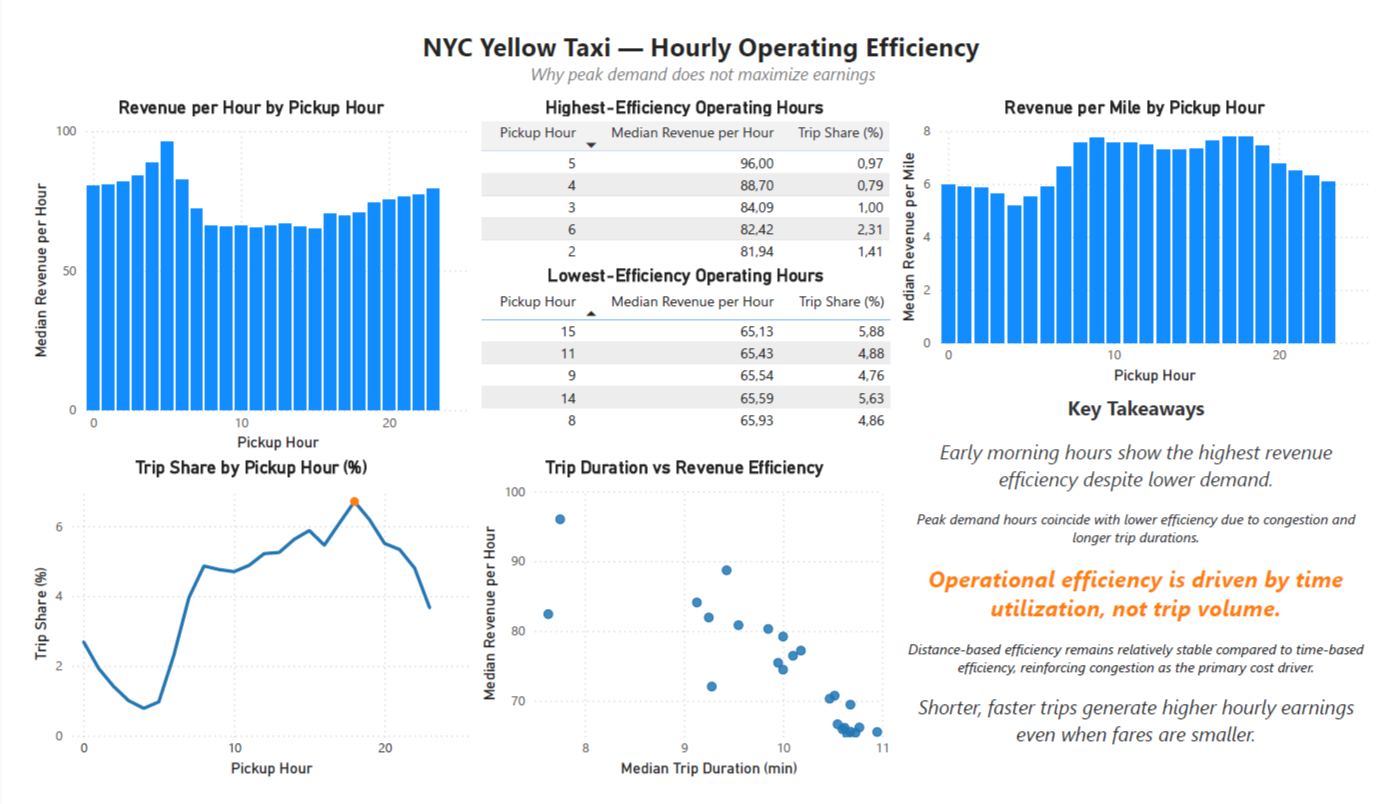

## 11.9 Author & Project Metadata

### Author

**John Koutnas**

Data Analyst Portfolio Project

---

### Date

January 2026

---

### Data Source

NYC Taxi & Limousine Commission (TLC)
Yellow Taxi Trip Records — January 2019

The dataset is a publicly available, cleaned subset of the NYC TLC trip record data, accessed via the official NYC Open Data / AWS-hosted distribution.

---

### Tools & Technologies

* **Python** (Pandas, NumPy) — data cleaning, validation, feature engineering
* **Jupyter Notebook** — exploratory analysis and documentation
* **Power BI** — dashboard design and visual analytics
* **Excel** — intermediate data inspection and validation

---

### Analytical Focus

* Time-based operational efficiency
* Median-based aggregation for robustness
* Demand vs efficiency comparison
* Decision-oriented visualization design

---

### License & Usage

The underlying dataset is released for public use by the NYC Taxi & Limousine Commission.
This analysis is provided for **educational and portfolio purposes only**.

---

### Contact

For questions, feedback, or collaboration opportunities:
**https://www.linkedin.com/in/ioanniskoutnas/**